<a href="https://colab.research.google.com/github/San-Maansson/Stock_Analysis/blob/main/50200SMA_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
resp = requests.get("https://eodhistoricaldata.com/api/eod/AAPL?api_token=demo&fmt=json")
json_data = json.loads(resp.content)
df = pd.DataFrame(json_data)
df

,date,open,high,low,close,adjusted_close,volume
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,0.0989,469033600
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,0.0938,175884800
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,0.0869,105728000
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,0.0891,86441600
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,0.0917,73449600
...,...,...,...,...,...,...,...
11050,2024-10-14,228.7000,231.7300,228.6000,231.3000,231.3000,39882100
11051,2024-10-15,233.6100,237.4900,232.3700,233.8500,233.8500,64751400
11052,2024-10-16,231.6000,232.1200,229.8400,231.7800,231.7800,34082200
11053,2024-10-17,233.4300,233.8500,230.5200,232.1500,232.1500,32978900


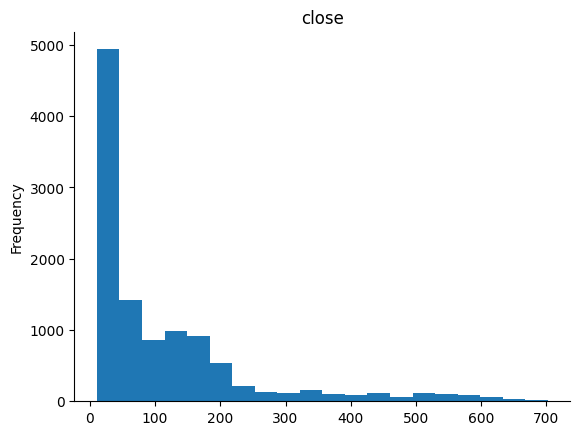

In [ ]:
# @title close

from matplotlib import pyplot as plt
df['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df["sma50"] = df.close.rolling(50, min_periods=50).mean()
df["sma200"] = df.close.rolling(200, min_periods=200).mean()
df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,0.0989,469033600,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,0.0938,175884800,NaN,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,0.0869,105728000,NaN,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,0.0891,86441600,NaN,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,0.0917,73449600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11050,2024-10-14,228.7000,231.7300,228.6000,231.3000,231.3000,39882100,223.6666,198.94535
11051,2024-10-15,233.6100,237.4900,232.3700,233.8500,233.8500,64751400,224.1582,199.14670
11052,2024-10-16,231.6000,232.1200,229.8400,231.7800,231.7800,34082200,224.6492,199.34295
11053,2024-10-17,233.4300,233.8500,230.5200,232.1500,232.1500,32978900,225.0958,199.57550


In [ ]:
df.dropna(inplace=True)
df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200
199,1981-09-28,14.3808,14.4928,14.3808,14.3808,0.0495,91728000,21.208320,26.459888
200,1981-09-29,15.1200,15.2544,15.1200,15.1200,0.0520,94684800,21.028224,26.391792
201,1981-09-30,15.2544,15.3664,15.2544,15.2544,0.0525,49996800,20.853504,26.331760
202,1981-10-01,15.2544,15.3664,15.2544,15.2544,0.0525,61129600,20.706112,26.281808
203,1981-10-02,16.5088,16.6208,16.5088,16.5088,0.0568,45046400,20.571264,26.234992
...,...,...,...,...,...,...,...,...,...
11050,2024-10-14,228.7000,231.7300,228.6000,231.3000,231.3000,39882100,223.666600,198.945350
11051,2024-10-15,233.6100,237.4900,232.3700,233.8500,233.8500,64751400,224.158200,199.146700
11052,2024-10-16,231.6000,232.1200,229.8400,231.7800,231.7800,34082200,224.649200,199.342950
11053,2024-10-17,233.4300,233.8500,230.5200,232.1500,232.1500,32978900,225.095800,199.575500


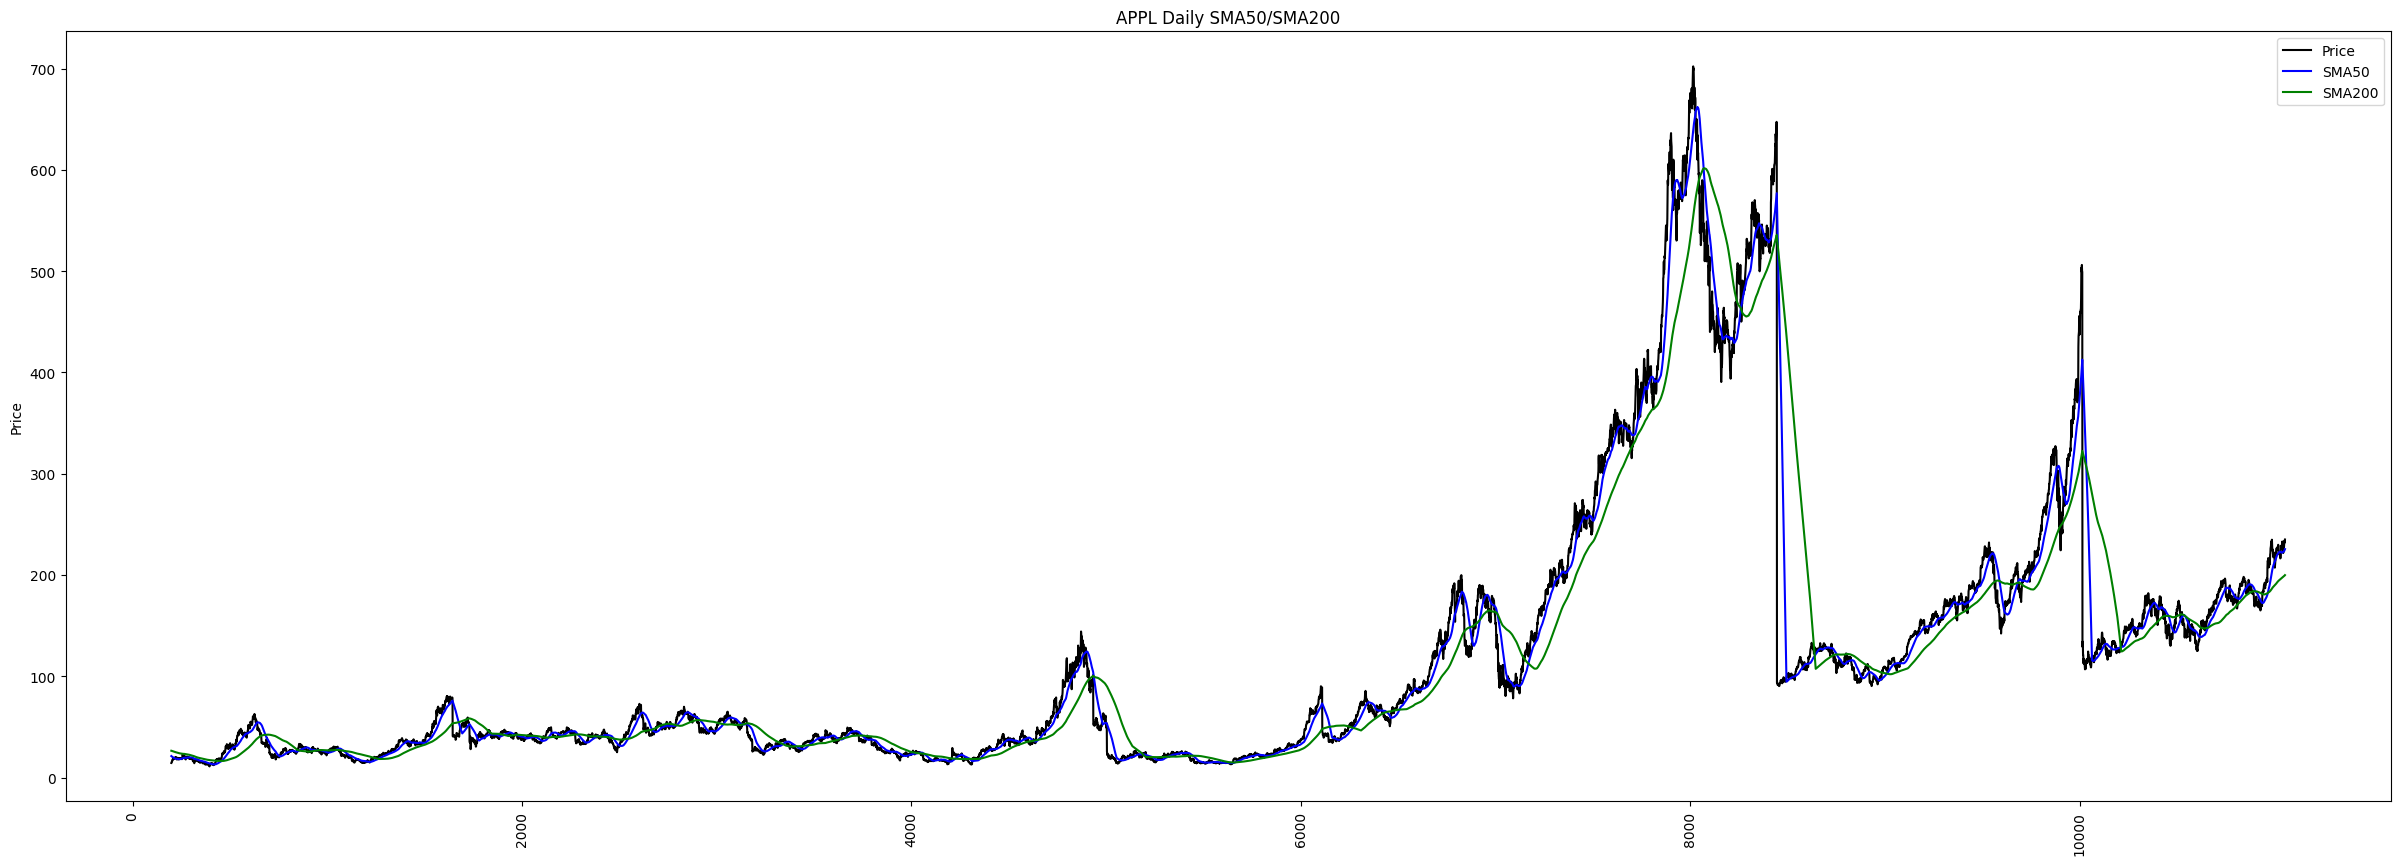

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("APPL Daily SMA50/SMA200")
plt.legend()
plt.show()

In [ ]:
df = df.tail(365)

In [ ]:
df.set_index(['date'], inplace=True)
df

,open,high,low,close,adjusted_close,volume,sma50,sma200
date,,,,,,,,
2023-05-09,173.05,173.54,171.60,171.77,170.4293,45326900,160.7536,151.55135
2023-05-10,173.02,174.03,171.90,173.56,172.2053,53724500,161.2766,151.65440
2023-05-11,173.85,174.59,172.17,173.75,172.3939,49514700,161.8454,151.76515
2023-05-12,173.62,174.06,171.00,172.57,171.4599,45497800,162.3786,151.84405
2023-05-15,173.16,173.21,171.47,172.07,170.9631,37266700,162.7994,151.91765
...,...,...,...,...,...,...,...,...
2024-10-14,228.70,231.73,228.60,231.30,231.3000,39882100,223.6666,198.94535
2024-10-15,233.61,237.49,232.37,233.85,233.8500,64751400,224.1582,199.14670
2024-10-16,231.60,232.12,229.84,231.78,231.7800,34082200,224.6492,199.34295


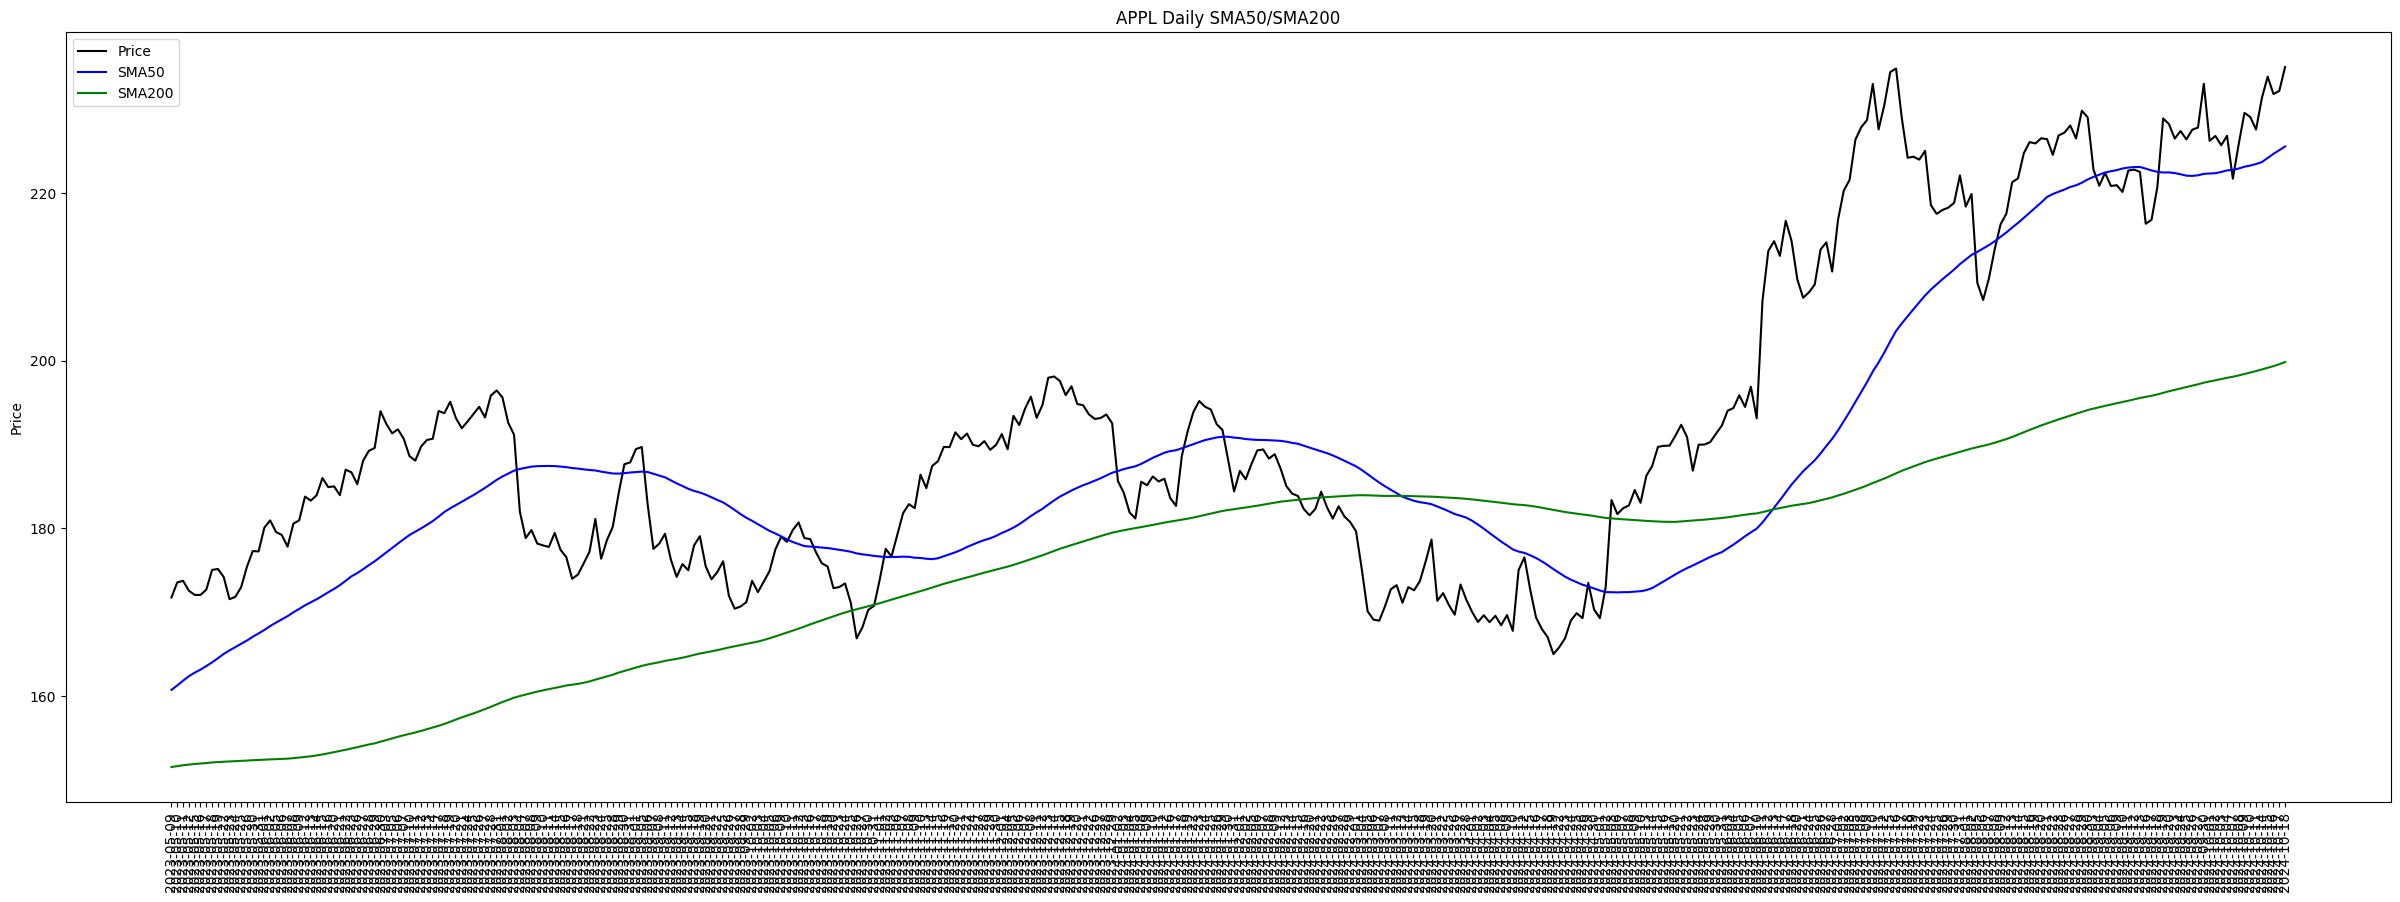

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("APPL Daily SMA50/SMA200")
plt.legend()
plt.show()

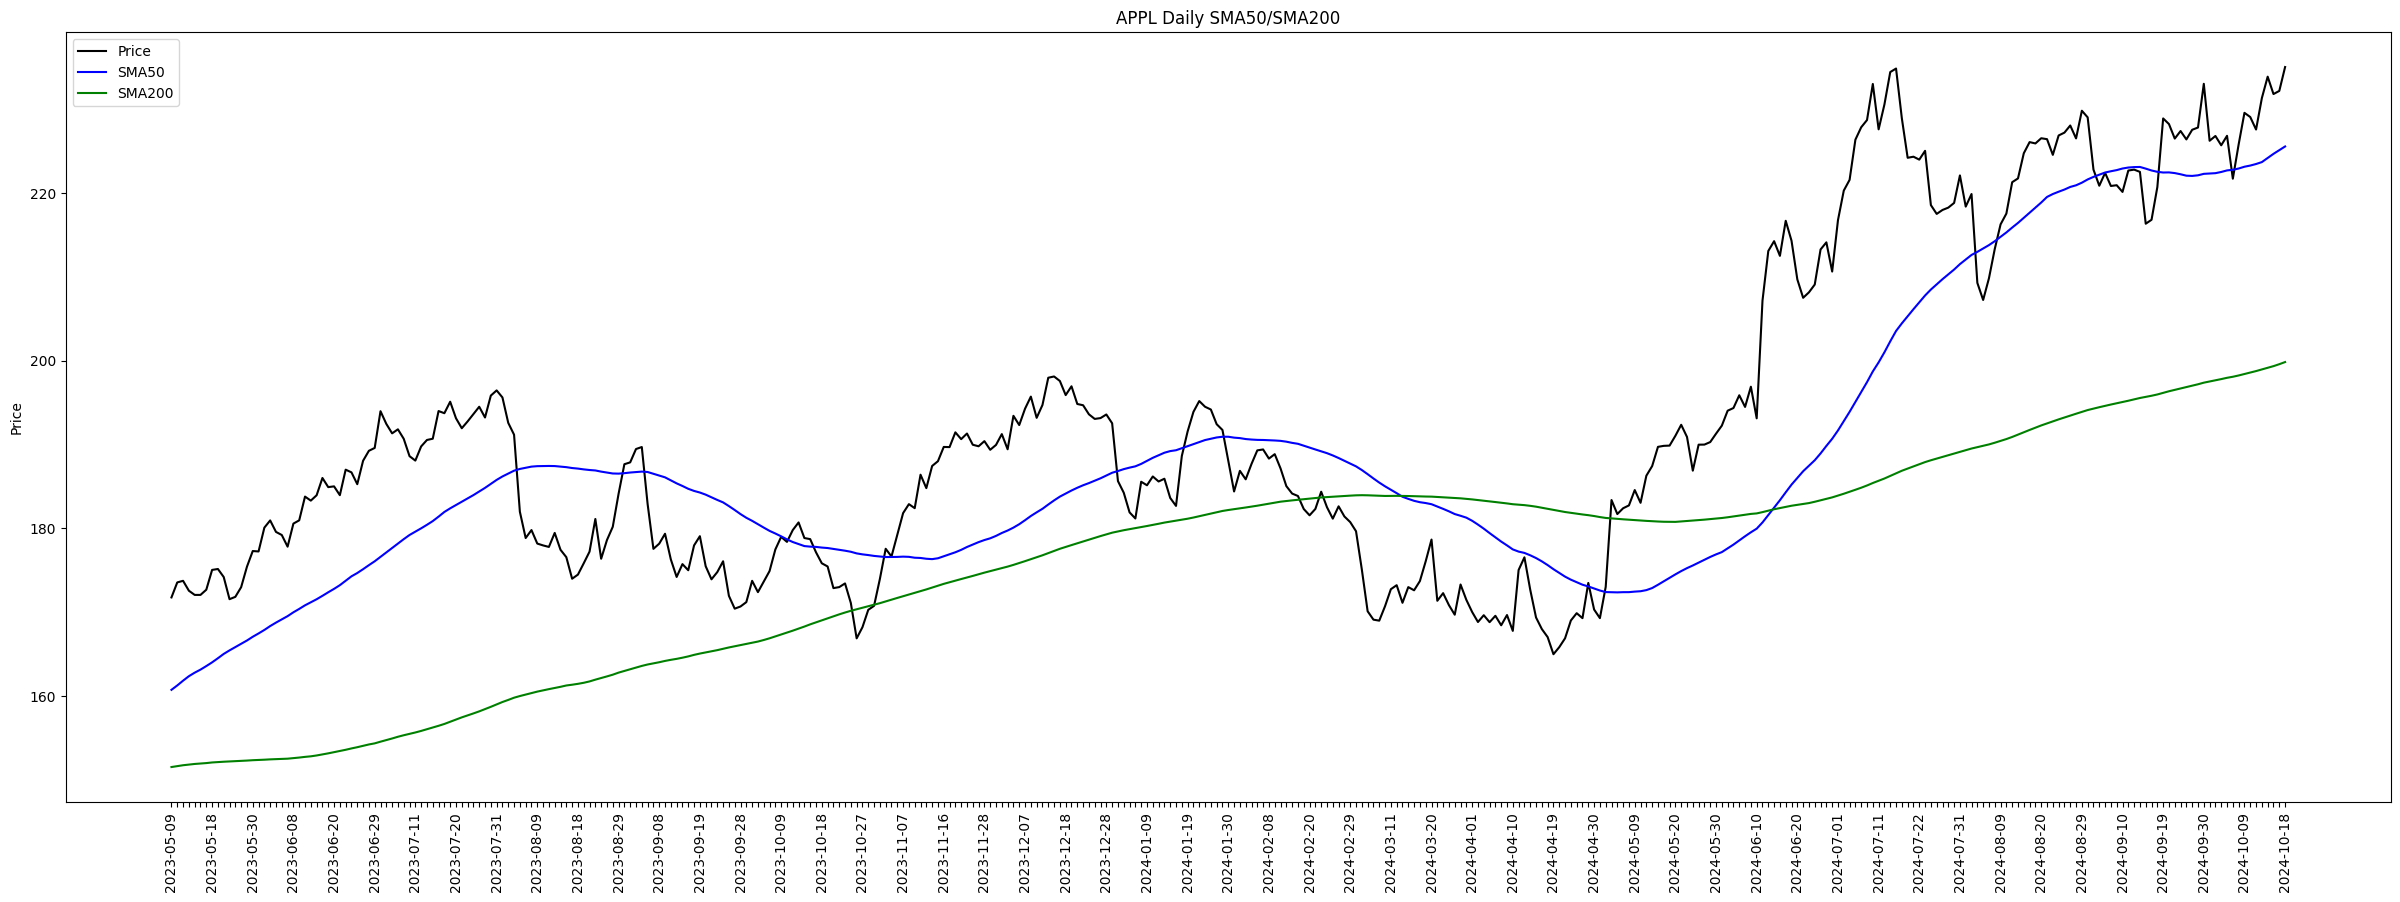

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("APPL Daily SMA50/SMA200")
# Check if an index number is divisible by 7.
# If not, the corresponding x-axis label will be hidden, leaving only every seventh day visible.
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
  if index % 7 != 0:
    label.set_visible(False)
plt.legend()
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None
df.loc[df["sma50"] > df["sma200"], "sma50gtsma200"] = True
df.fillna({"sma50gtsma200": False}, inplace=True)
df.loc[df["sma50"] < df["sma200"], "sma50ltsma200"] = True
df.fillna({"sma50gtsma200": False}, inplace=True)
df

<ipython-input-94-8b3141459c36>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({"sma50gtsma200": False}, inplace=True)


,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200
date,,,,,,,,,,
2023-05-09,173.05,173.54,171.60,171.77,170.4293,45326900,160.7536,151.55135,True,NaN
2023-05-10,173.02,174.03,171.90,173.56,172.2053,53724500,161.2766,151.65440,True,NaN
2023-05-11,173.85,174.59,172.17,173.75,172.3939,49514700,161.8454,151.76515,True,NaN
2023-05-12,173.62,174.06,171.00,172.57,171.4599,45497800,162.3786,151.84405,True,NaN
2023-05-15,173.16,173.21,171.47,172.07,170.9631,37266700,162.7994,151.91765,True,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-14,228.70,231.73,228.60,231.30,231.3000,39882100,223.6666,198.94535,True,NaN
2024-10-15,233.61,237.49,232.37,233.85,233.8500,64751400,224.1582,199.14670,True,NaN
2024-10-16,231.60,232.12,229.84,231.78,231.7800,34082200,224.6492,199.34295,True,NaN


In [ ]:
# Now, we want to identify the precise point at which the crossover occurs. You can achieve this with the following approach:

df["sma50gtsma200co"] = df.sma50gtsma200.ne(df.sma50gtsma200.shift())
df.loc[df["sma50gtsma200"] == False, "sma50gtsma200co"] = False

df["sma50ltsma200co"] = df.sma50ltsma200.ne(df.sma50ltsma200.shift())
df.loc[df["sma50ltsma200"] == False, "sma50ltsma200co"] = False

df

,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
date,,,,,,,,,,,,
2023-05-09,173.05,173.54,171.60,171.77,170.4293,45326900,160.7536,151.55135,True,NaN,True,True
2023-05-10,173.02,174.03,171.90,173.56,172.2053,53724500,161.2766,151.65440,True,NaN,False,True
2023-05-11,173.85,174.59,172.17,173.75,172.3939,49514700,161.8454,151.76515,True,NaN,False,True
2023-05-12,173.62,174.06,171.00,172.57,171.4599,45497800,162.3786,151.84405,True,NaN,False,True
2023-05-15,173.16,173.21,171.47,172.07,170.9631,37266700,162.7994,151.91765,True,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-14,228.70,231.73,228.60,231.30,231.3000,39882100,223.6666,198.94535,True,NaN,False,True
2024-10-15,233.61,237.49,232.37,233.85,233.8500,64751400,224.1582,199.14670,True,NaN,False,True
2024-10-16,231.60,232.12,229.84,231.78,231.7800,34082200,224.6492,199.34295,True,NaN,False,True
